In [53]:
with open('/root/autodl-tmp/SSC/data/score/frank_type_score_0330.json', 'r') as f:
    data = json.load(f)
[key for key in data]

['ClozEEval', 'FactccEval', 'FEQAEval', 'SummaCConvEval', 'DAEEval']

In [35]:
def get_per_10_percent(l):
    temp_list = []
    for index, item in enumerate(l):
        temp_list.append([index, item])
    sorted_list = [[k, v] for k, v in sorted(temp_list, key=lambda item: item[1])]
    basic_size = len(sorted_list)//10
    result = [sorted_list[i * basic_size:(i + 1) * basic_size] for i in range(10)]
    return result
def get_value(l, index_list):
    return [l[index] for index in index_list]

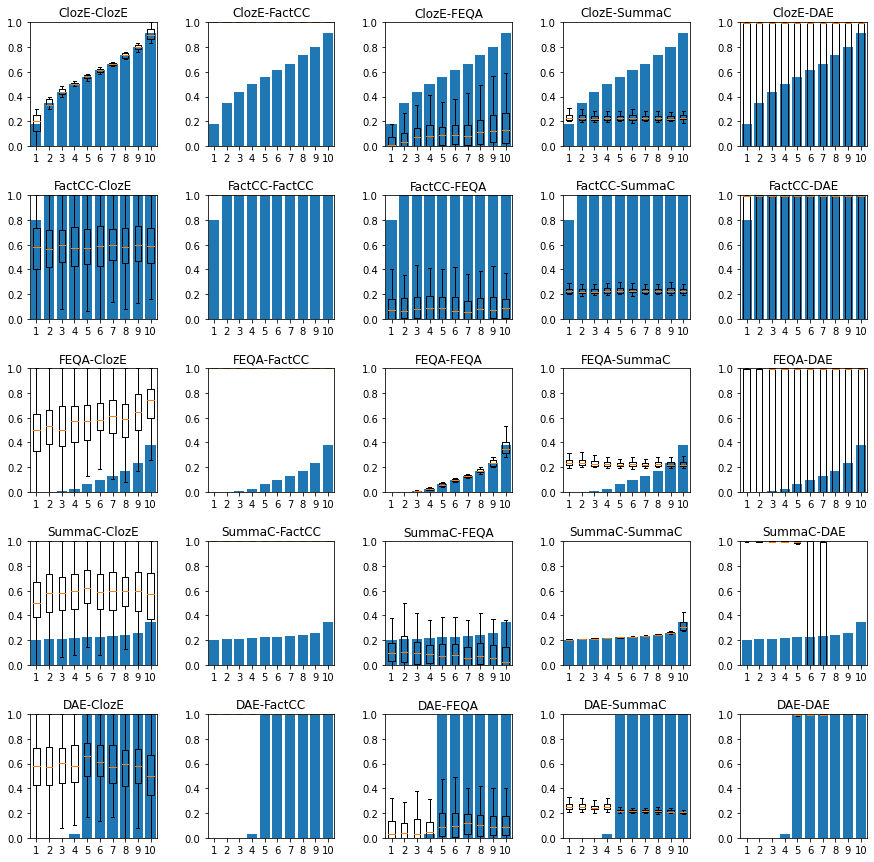

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pdb

# 生成5个包含随机数据的数组
data = l
method_list = ['ClozE', 'FactCC', 'FEQA', 'SummaC', 'DAE']

# 将5个数组中的数据按照10%分位数进行分组（每前10%为一组），并绘制箱线图
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        x = [i+1 for i in range(10)]
        data_1 = l[i]
        data_1_10p = get_per_10_percent(data_1)
        data_1_bar = np.mean([[i[1] for i in item] for item in data_1_10p],axis=1)
        index_list = [[i[0] for i in item] for item in data_1_10p]
        data_2_box = [get_value(l[j], index_l) for index_l in index_list]
        axs[i,j].set_ylim([0, 1])
        axs[i,j].boxplot(data_2_box, showfliers=False)
        axs[i,j].bar(x, data_1_bar)
        axs[i,j].set_title(f"{method_list[i]}-{method_list[j]}")
        
            
# 设置子图间距
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# 显示图形
plt.show()


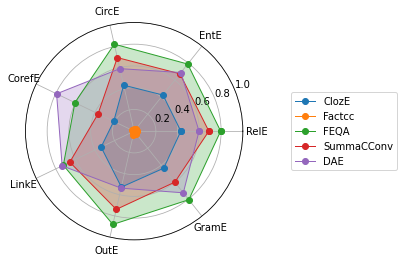

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pdb

# 创建数据

categories = [key for key in data['ClozEEval']]
values = {}
for key in data:
    values[key] = [1-np.mean(data[key][k]) for k in data[key]]


# 计算角度并将第一个角度重复两次，以便闭合曲线
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))



# 绘制雷达图
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

for key in values:
    values[key] = np.concatenate((values[key],[values[key][0]]))
    ax.plot(angles, values[key], 'o-', linewidth=1, label=key[:-4])
    ax.fill(angles, values[key], alpha=0.25)



# 设置坐标轴标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

ax.grid(True)

# 设置坐标最大数值为1
ax.set_ylim([0, 1])


ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# 显示图形
plt.show()

In [69]:
data['FactccEval']

{'RelE': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'EntE': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1